# 1. 데이터 불러오기

In [1]:
# 패키지 import
import pandas as pd
import numpy as np

In [2]:
# Pandas 출력 최대치 설정, 열24개, 행 20개
pd.set_option('max_columns', 24,'max_rows', 20) 

In [3]:
# Window의 기본 인코딩은 cp949 
# 상황에 맞게 수정
df = pd.read_csv('data.csv',encoding ='cp949')

# 2. 데이터 탐색

### H 백화점의 고객별 구매 정보 데이터 입니다. (절대 유출 금지)  
   - 0 : 여성 , 1 : 남성
   
### 실습으로 해볼 Task는 다음과 같습니다  
   
   - 데이터 파악  
   - 성별과 관련있는 변수 생성 ( Feature Engineering )
       

### 2-1) Describe

____

In [4]:
# 데이터 첫 5개의 값 확인
df.head()

,custid,총구매액,총구매건수,평균구매액,최대구매액,총할인액,평균할인액,평균할부개월수,최대할부개월수,구입브랜드수,브랜드편중도,수입상품구매율,내점일수,주말방문비율,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,저녁구매비율,주구매브랜드,주구매코너,주구매시간,주방문요일,gender
0,0,1742000,11,158363.636364,455000,174200,15836.363636,2.818182,3,7,0.363636,0.636364,7,0.636364,0.090909,0.363636,0.272727,0.272727,0.818182,크리니크,수입종합화장품,19.0,일,1
1,1,2772100,26,106619.230769,393000,56630,2178.076923,2.461538,3,19,0.269231,0.423077,16,0.500000,0.384615,0.346154,0.230769,0.038462,0.115385,겐조수입의류,수입부띠끄,16.0,토,1
2,2,3750850,11,340986.363636,1416000,255090,23190.000000,3.454545,12,7,0.363636,0.090909,7,0.363636,NaN,0.272727,0.454545,0.272727,0.363636,노티카,가전특정,19.0,수,1
3,3,2300500,30,76683.333333,621000,91660,3055.333333,2.666667,5,21,0.300000,0.000000,13,0.366667,0.300000,0.400000,0.100000,0.200000,0.400000,라코스테,골프(LC),18.0,목,0
4,4,1045000,4,261250.000000,560000,21800,5450.000000,4.500000,10,4,0.000000,0.250000,2,0.250000,NaN,1.000000,NaN,NaN,0.000000,리츠,니트웨어,14.0,목,0


In [5]:
# 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
custid     30000 non-null int64
총구매액       30000 non-null int64
총구매건수      30000 non-null int64
평균구매액      30000 non-null float64
최대구매액      30000 non-null int64
총할인액       30000 non-null int64
평균할인액      30000 non-null float64
평균할부개월수    30000 non-null float64
최대할부개월수    30000 non-null int64
구입브랜드수     30000 non-null int64
브랜드편중도     30000 non-null float64
수입상품구매율    30000 non-null float64
내점일수       30000 non-null int64
주말방문비율     30000 non-null float64
봄구매비율      25942 non-null float64
여름구매비율     23859 non-null float64
가을구매비율     24264 non-null float64
겨울구매비율     24501 non-null float64
저녁구매비율     30000 non-null float64
주구매브랜드     30000 non-null object
주구매코너      30000 non-null object
주구매시간      26316 non-null float64
주방문요일      30000 non-null object
gender     30000 non-null int64
dtypes: float64(12), int64(9), object(3)
memory usage: 5.5+ MB


In [6]:
# 데이터의 요약 통계 확인
df.describe()

,custid,총구매액,총구매건수,평균구매액,최대구매액,총할인액,평균할인액,평균할부개월수,최대할부개월수,구입브랜드수,브랜드편중도,수입상품구매율,내점일수,주말방문비율,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,저녁구매비율,주구매시간,gender
count,30000.000000,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,25942.000000,23859.000000,24264.000000,24501.000000,30000.000000,26316.000000,30000.000000
mean,14999.500000,3.402056e+06,34.555100,1.020029e+05,6.495710e+05,1.152073e+05,3609.591506,1.901824,3.632467,17.513567,0.342929,0.179094,17.999400,0.398134,0.326003,0.314477,0.290892,0.284948,0.223898,15.257714,0.303933
std,8660.398374,5.105445e+06,40.059543,9.010523e+04,1.085766e+06,2.255333e+05,4046.594095,0.711563,2.089912,14.926048,0.215027,0.193038,19.057196,0.258735,0.212981,0.191331,0.180527,0.187779,0.224879,2.423335,0.459962
min,0.000000,-1.139081e+07,1.000000,-8.185000e+05,1.403600e+04,-5.856100e+05,-40925.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.009804,0.007194,0.014706,0.006536,0.000000,10.000000,0.000000
25%,7499.750000,7.087475e+05,10.000000,5.464197e+04,1.960000e+05,1.820000e+04,1330.351562,1.421053,3.000000,7.000000,0.187500,0.050000,6.000000,0.214286,0.185185,0.181818,0.170732,0.160000,0.036364,13.000000,0.000000
50%,14999.500000,1.769817e+06,21.000000,8.116833e+04,3.747000e+05,4.905500e+04,2555.331243,1.826087,3.000000,13.000000,0.346154,0.125000,12.000000,0.366667,0.275362,0.275862,0.250000,0.248521,0.166667,15.000000,0.000000
75%,22499.250000,4.016975e+06,44.000000,1.226667e+05,7.020000e+05,1.204575e+05,4504.706101,2.247807,3.000000,24.000000,0.500000,0.250000,23.000000,0.555556,0.400000,0.400000,0.362745,0.355263,0.333333,17.000000,1.000000
max,29999.000000,1.142390e+08,589.000000,6.845000e+06,7.200000e+07,6.222800e+06,152875.000000,12.000000,12.000000,182.000000,0.952663,1.000000,249.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


____

### 2-2) Visualization 

### Matplotlib - 파이썬 시각화 패키지

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맑은 고딕을 사용하겠습니다 !
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


____
### 1) Line plot

가장 간단한 플롯은 선을 그리는 라인 플롯(line plot)입니다. 

라인 플롯은 데이터가 시간, 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용합니다.

명령은 `plot` 명령을 사용합니다.


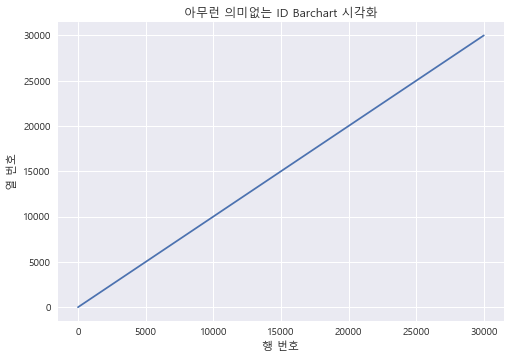

In [9]:
plt.title("아무런 의미없는 ID Barchart 시각화")
plt.plot(df['custid']) # df의 custid 열을 line chart로 시각화 하는 코드
plt.xlabel('행 번호') # x 축의 레이블 지정
plt.ylabel('열 번호') # y 축의 레이블 지정
plt.show()

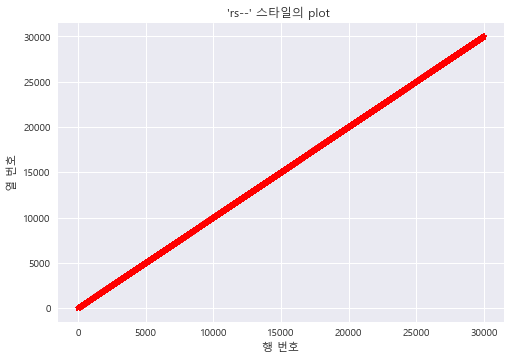

In [10]:
# 선 스타일도 원하는 대로 바꿔줄 수 있습니다.
plt.title("'rs--' 스타일의 plot ")
plt.plot(df['custid'],'r*--')  #r은 색 s는 마커 --는 선종류
plt.xlabel('행 번호') # x 축의 레이블 지정
plt.ylabel('열 번호') # y 축의 레이블 지정
plt.show()

#### 스타일 문자열은 색깔(color), 마커(marker), 선 종류(line style)의 순서로 지정합니다.   
#### 만약 이 중 일부가 생략되면 디폴트값이 적용됩니다.  
#### ex) rs-- 
       ==> 색 : red , 마커 : square , 선 : --모양

### 색

자주 사용되는 색은 한 글자 약자로 지정 할 수 있습니다.  

약자는 다음과 같습니다.  

| 문자열 | 약자 |
|-|-|
| `blue` | `b` |
| `green` | `g` |
| `red` | `r` |
| `cyan` | `c` |
| `magenta` | `m` |
| `yellow` | `y` |
| `black` | `k` |
| `white` | `w` |


### 마커

 데이터 위치를 나타내는 기호를 마커(marker)라고 합니다.   
   
 마커의 종류는 다음과 같습니다.

| 마커 문자열 | 의미 |
|-|-|
| `.` | point marker  |
| `,` | pixel marker |
| `o` | circle marker |
| `v` | triangle_down marker |
| `^` | triangle_up marker |
| `<` | triangle_left marker |
| `>` | triangle_right marker |
| `1` | tri_down marker |
| `2` | tri_up marker |
| `3` | tri_left marker |
| `4` | tri_right marker |
| `s` | square marker |
| `p` | pentagon marker |
| `*` | star marker |
| `h` | hexagon1 marker |
| `H` | hexagon2 marker |
| `+` | plus marker |
| `x` | x marker |
| `D` | diamond marker |
| `d` | thin_diamond marker |

### 스타일
선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit) 이 있습니다. 
  
지정 문자열은 다음과 같습니다.

| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

____
### 2) Bar plot

Bar chart의 경우 , `bar` 명령과 `barh` 명령으로 시각화를 할 수 있습니다.  

가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용합니다.

자세한 내용은 다음을 참조하세요.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh


In [11]:
gender = df['gender'].value_counts() # value_counts는 클래스 별 갯수를 반환

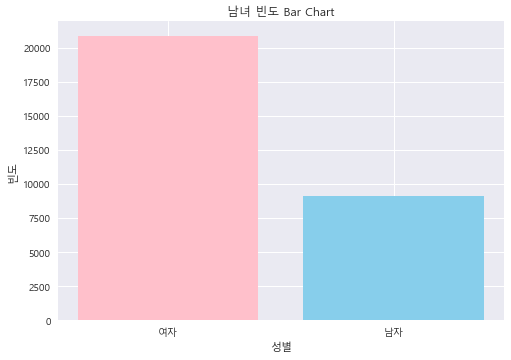

In [12]:
plt.bar(gender.index,gender, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(gender.index, ['여자','남자']) # x축을 여자,남자 범주로 변환
plt.title('남녀 빈도 Bar Chart')
plt.xlabel('성별')
plt.ylabel('빈도')
plt.show()


### 3) Pie Chart

카테고리 별 값의 상대적인 비교를 해야 할 때는 `pie` 명령으로 파이 차트(pie chart)를 그릴 수 있습니다. 

파이 차트를 그릴 때는 윈의 형태를 유지할 수 있도록 다음 명령을 실행해야 합니다.

```
plt.axis('equal')
```

자세한 내용은 다음을 참조하세요~

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

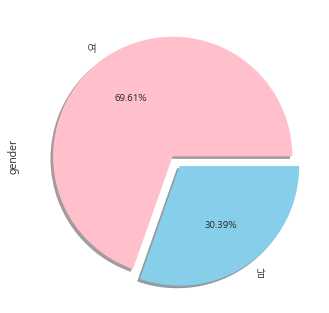

In [13]:
# Pandas에서 바로 plot으로 넘길수도 있습니다.
# explode는 삐져나오는 정도 설정
# autopct는 숫자 설정 format입니다.

gender.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, labels =['여','남'],colors =['pink','skyblue']) 
plt.show()

### 4) Histogram

히스토그램을 그리기 위한 `hist` 명령도 있습니다. `hist` 명령은 `bins` 인수로 데이터를 집계할 구간 정보를 받습니다.

자세한 내용은 다음을 참조하세요
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

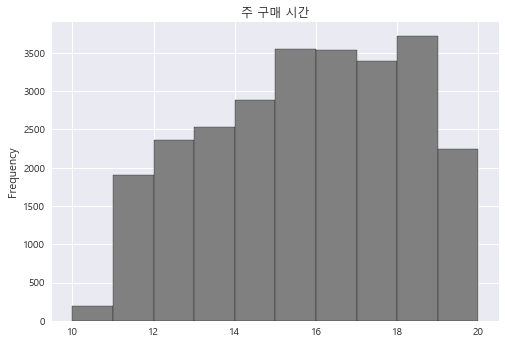

In [14]:
df['주구매시간'].plot.hist(bins=10,color='grey',edgecolor='black')
plt.title('주 구매 시간')
plt.show()

### 5) Scatter Plot
2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그립니다.  
  
스캐터 플롯의 점 하나의 위치는 데이터 하나의 x, y 값입니다.  

자세한 내용은 다음을 참조하세요  
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

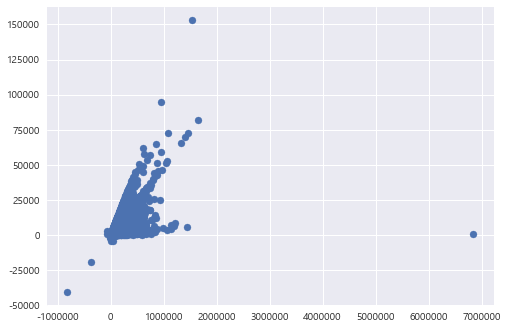

In [15]:
plt.scatter(x=df['평균구매액'],y=df['평균할인액'])
plt.show()

___

### * Data Visualization with Seaborn

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지입니다.   
Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조하세요

* https://seaborn.github.io/ 
____

### * Seaborn Style
Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꿀 수 있습니다.  
  
- ex) ```plt.style.use('seaborn')```  
     

    
따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다릅니다. 

* http://seaborn.pydata.org/tutorial/aesthetics.html

`set` 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꿀 수 있습니다.  
`set_style` 명령은 틱 스타일만 바꿀 수 있습니다.`darkgrid`, `whitegrid`, `dark`, `white`, 그리고 `ticks` 스타일을 제공합니다.  

`set_color_codes` 명령으로는 기본 색상을 가리키는 문자열을 바꿀수 있습니다.  
예를 들어 `set_color_codes` 명령이 적용되기 이전과 이후에 `red` 문자열이 가리키는 실제 색상 코드는 다릅니다.  

* `set`: http://seaborn.pydata.org/generated/seaborn.set.html
* `set_style`: http://seaborn.pydata.org/generated/seaborn.set_style.html
* `set_color_codes`: http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

___

### * Color

Seaborn은 스타일 지정을 위한 색상 팔렛트(color palette)라는 것을 지원합니다. 
색상 팔렛트는 Matplotlib의 칼라맵(colormap)으로 사용할 수도 있습니다.  
자세한 내용은 Seaborn의 문서를 참조하세요.

* http://seaborn.pydata.org/tutorial/color_palettes.html

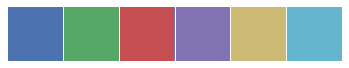

In [16]:
current_palette = sns.color_palette()
sns.palplot(current_palette) # 현재 쓰고있는 컬러 팔레트

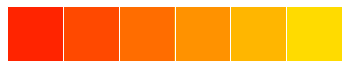

In [17]:
sns.palplot(sns.color_palette("autumn")) # 가을 팔레트

In [18]:
'sns.set_palette("autumn")' # <- 이런식으로 팔레트를 설정 할 수 있습니다.
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

____

### 6) KDE Plot (Seaborn) 

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.  

* `kdeplot`: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


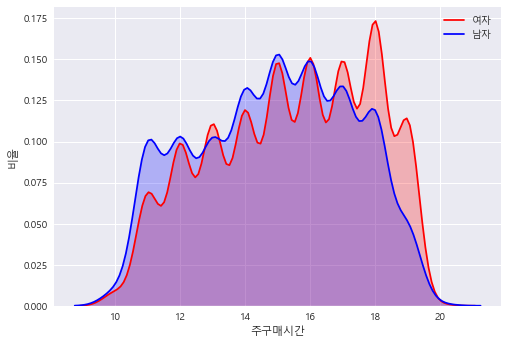

In [19]:
# Seaborn은 그래프를 객체로 지정해 줘야 설정이 편합니다

g = sns.kdeplot(df.query('gender == 0')['주구매시간'], color = "red",shade= True)
g = sns.kdeplot(df.query('gender == 1')['주구매시간'], color = 'blue', shade = True)
g.set_xlabel('주구매시간') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

### 7) Count Plot (Seaborn)
`countplot` 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있습니다.  
`matplotlib` 의 Barplot과 비슷해요 !

* `countplot`: http://seaborn.pydata.org/generated/seaborn.countplot.html

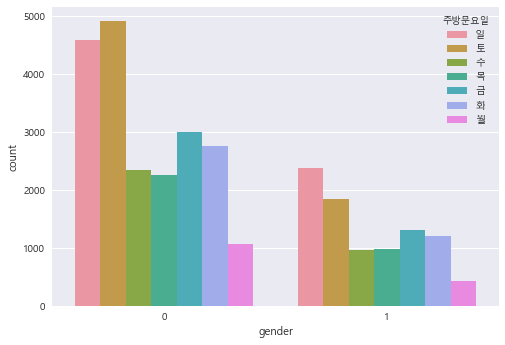

In [20]:
sns.countplot("gender", hue='주방문요일' , data=df) # gender를 기준으로 count 분리, 
plt.show() 

### 8) Heatmap

`heatmap`을 통해 변수간 상관관계를 한 눈에 볼 수 있습니다.  

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

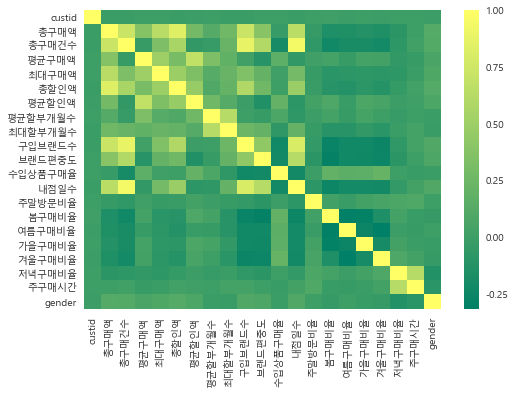

In [21]:
sns.heatmap(df.corr(),cmap='summer')
plt.show()
# 피쳐가 많아서 좀 느낌없네요

### 9) lmplot (Seaborn)
`lmplot`은 산포도에 직선을 그어서 추세선을 확인할수 있습니다.  
  
* `lmplot`: https://seaborn.pydata.org/generated/seaborn.lmplot.html

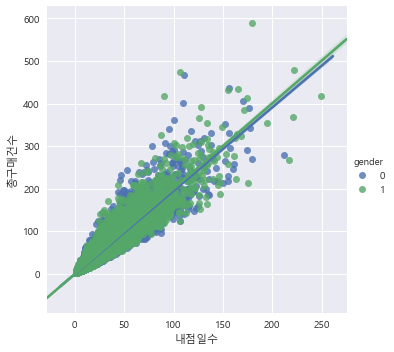

In [22]:
sns.lmplot(x='내점일수',y='총구매건수',hue='gender',data=df)

### 10) Pair Plot

`pairplot`은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 산점도를 그립니다.  
같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그립니다.

* `pairplot`: http://seaborn.pydata.org/generated/seaborn.pairplot.html

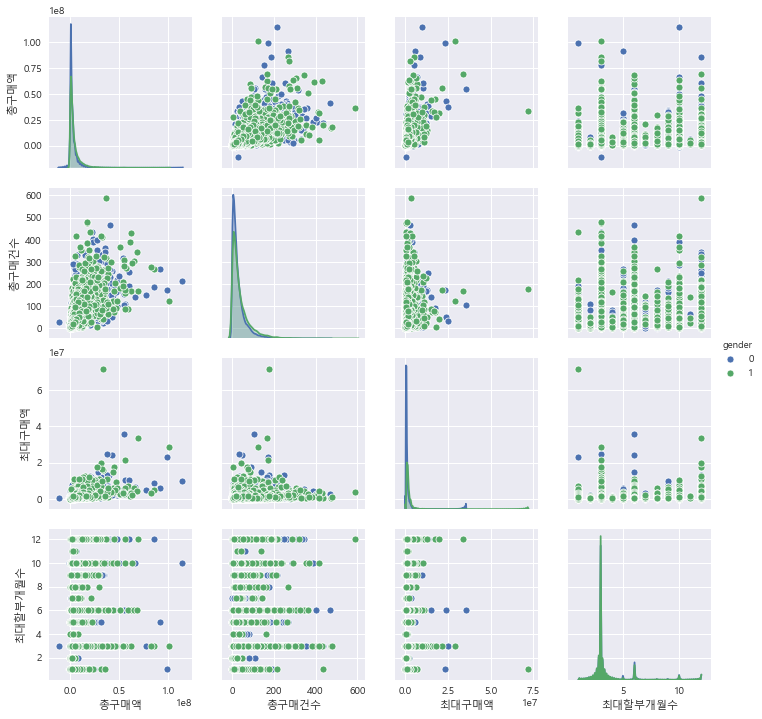

In [23]:
sns.pairplot(data=df, vars=['총구매액','총구매건수','최대구매액','최대할부개월수'] ,hue='gender') 
plt.show()

### * Subplot

#### Plot의 구조

Plot은 Figure 객체, Axes 객체, Axis 객체 등으로 구성됩니다.  
Figure 객체는 한 개 이상의  Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함합니다.  
다음 그림은 이 구조를 설명하고 있습니다.

<img src="https://datascienceschool.net/upfiles/4e20efe6352e4f4fac65c26cb660f522.png" style="width: 80%">
<img src="https://matplotlib.org/_images/anatomy.png" style="width: 70%">

Figure는 그림이 그려지는 캔버스나 종이를 뜻하고 Axes는 하나의 플롯, 그리고 Axis는 가로축이나 세로축 등의 축을 뜻합니다.  

___


#### Axes 객체와 `subplot` 명령

때로는 하나의 윈도우(Figure)안에 여러개의 플롯을 배열 형태로 보여야하는 경우도 있습니다.  
Figure 안에 있는 각각의 플롯은 위에 설명한 Axes 라고 불리는 객체에 속합니다. 
* http://Matplotlib.org/api/axes_api.html#Matplotlib.axes.Axes

Figure 안에 Axes를 생성하려면 원래 `subplot` 명령을 사용하여 명시적으로 Axes 객체를 얻어야 합니다. 
그러나 plot 명령을 바로 사용해도 자동으로 Axes를 생성해 줍니다.

`subplot` 명령은 그리드(grid) 형태의 Axes 객체들을 생성해주는데  
Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 됩니다.

`subplot` 명령은 또, 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고,  
세번째 인수가 네 개 중 어느것인지를 의미하는 숫자입니다.  
따라서 위/아래 두개의 플롯을 하나의 Figure 안에 그리기 위한 코드는 다음과 같습니다. 


`subplot(2, 1, 1)  
여기에 윗부분에 그릴 플롯 명령 실행  `  
`subplot(2, 1, 2)
여기에 아랫부분에 그릴 플롯 명령 실행`
  
마지막으로 `tight_layout` 명령을 실행하면 플롯간의 간격을 자동으로 맞춰줍니다.

___


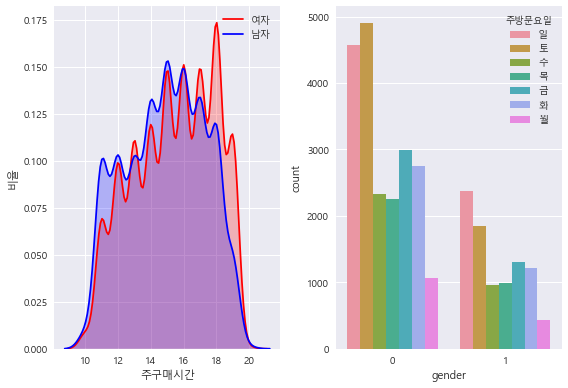

In [24]:
# subplot 예시를 위해 위의 plot을 이용하겠습니다 !

# 1번 plot
g = plt.subplot(1,2,1)
g = sns.kdeplot(df.query('gender == 0')['주구매시간'], color = "red",shade= True)
g = sns.kdeplot(df.query('gender == 1')['주구매시간'], color = 'blue', shade = True)
g.set_xlabel('주구매시간')
g.set_ylabel('비율')
g = g.legend(['여자','남자'])

# 2번 plot
g2 = plt.subplot(1,2,2)
g2 = sns.countplot("gender", hue='주방문요일' , data=df) 


plt.tight_layout()
plt.show()

#### * `Subplots` 함수 
`subplots` 명령으로 복수의 Axes 객체를 동시에 생성할 수도 있습니다.  
  
이렇게 생성하는 방법이 훨씬 시각화의 확장성이 높습니다.  
( 이렇게 그리는 걸 익히는걸 추천합니다 ! )

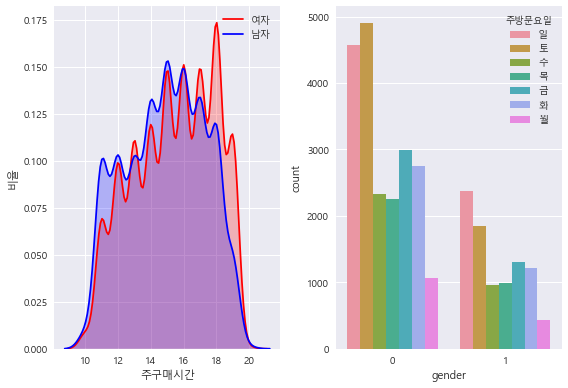

In [25]:
f,ax=plt.subplots(1,2) # 1x2 의 Figure 와 Axes

ax[0] = plt.subplot(1,2,1)
ax[0] = sns.kdeplot(df.query('gender == 0')['주구매시간'], color = "red",shade= True)
ax[0] = sns.kdeplot(df.query('gender == 1')['주구매시간'], color = 'blue', shade = True)
ax[0].set_xlabel('주구매시간')
ax[0].set_ylabel('비율')
ax[0] = ax[0].legend(['여자','남자'])

# 2번 plot
ax[1] = plt.subplot(1,2,2)
ax[1] = sns.countplot("gender", hue='주방문요일' , data=df) 

plt.tight_layout()
plt.show()


___

# 3) Pre-processing

In [26]:
# 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
custid     30000 non-null int64
총구매액       30000 non-null int64
총구매건수      30000 non-null int64
평균구매액      30000 non-null float64
최대구매액      30000 non-null int64
총할인액       30000 non-null int64
평균할인액      30000 non-null float64
평균할부개월수    30000 non-null float64
최대할부개월수    30000 non-null int64
구입브랜드수     30000 non-null int64
브랜드편중도     30000 non-null float64
수입상품구매율    30000 non-null float64
내점일수       30000 non-null int64
주말방문비율     30000 non-null float64
봄구매비율      25942 non-null float64
여름구매비율     23859 non-null float64
가을구매비율     24264 non-null float64
겨울구매비율     24501 non-null float64
저녁구매비율     30000 non-null float64
주구매브랜드     30000 non-null object
주구매코너      30000 non-null object
주구매시간      26316 non-null float64
주방문요일      30000 non-null object
gender     30000 non-null int64
dtypes: float64(12), int64(9), object(3)
memory usage: 5.5+ MB


### 결측값 처리

In [27]:
# 결측치 있는 열 확인
df.isnull().sum(axis=0)

custid        0
총구매액          0
총구매건수         0
평균구매액         0
최대구매액         0
총할인액          0
평균할인액         0
평균할부개월수       0
최대할부개월수       0
구입브랜드수        0
           ... 
봄구매비율      4058
여름구매비율     6141
가을구매비율     5736
겨울구매비율     5499
저녁구매비율        0
주구매브랜드        0
주구매코너         0
주구매시간      3684
주방문요일         0
gender        0
Length: 24, dtype: int64

In [28]:
# 잘 확인해 보면 NaN를 제외한 값의 합이 1인걸 알 수 있음
# 따라서 NaN = 0 
df.loc[df['봄구매비율'].isnull()]

,custid,총구매액,총구매건수,평균구매액,최대구매액,총할인액,평균할인액,평균할부개월수,최대할부개월수,구입브랜드수,브랜드편중도,수입상품구매율,내점일수,주말방문비율,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,저녁구매비율,주구매브랜드,주구매코너,주구매시간,주방문요일,gender
2,2,3750850,11,340986.363636,1416000,255090,23190.000000,3.454545,12,7,0.363636,0.090909,7,0.363636,NaN,0.272727,0.454545,0.272727,0.363636,노티카,가전특정,19.0,수,1
4,4,1045000,4,261250.000000,560000,21800,5450.000000,4.500000,10,4,0.000000,0.250000,2,0.250000,NaN,1.000000,NaN,NaN,0.000000,리츠,니트웨어,14.0,목,0
29,29,390480,8,48810.000000,149000,14850,1856.250000,1.000000,1,7,0.125000,0.125000,4,0.500000,NaN,0.500000,0.500000,NaN,0.375000,식품,수입종합화장품,17.0,목,0
32,32,6790343,25,271613.720000,739200,84500,3380.000000,4.040000,6,20,0.200000,0.120000,7,0.240000,NaN,NaN,0.640000,0.360000,0.040000,식품,용기보증,15.0,수,0
36,36,80000,1,80000.000000,80000,4000,4000.000000,3.000000,3,1,0.000000,0.000000,1,0.000000,NaN,NaN,1.000000,NaN,0.000000,비오뗌,수입종합화장품,16.0,금,0
37,37,30000,3,10000.000000,320000,1500,500.000000,2.333333,3,2,0.333333,0.000000,2,0.000000,NaN,1.000000,NaN,NaN,0.000000,탐라쥬얼리,보석,13.0,수,1
45,45,142000,1,142000.000000,142000,7100,7100.000000,3.000000,3,1,0.000000,0.000000,1,0.000000,NaN,1.000000,NaN,NaN,0.000000,아베다,수입종합화장품,13.0,화,0
56,56,174400,4,43600.000000,68000,8730,2182.500000,1.000000,1,4,0.000000,0.250000,3,0.750000,NaN,0.750000,NaN,0.250000,0.250000,용신양말,수입종합화장품,17.0,일,1
61,61,1100600,6,183433.333333,360000,52650,8775.000000,1.833333,6,6,0.000000,0.333333,2,0.000000,NaN,NaN,0.833333,0.166667,0.333333,랑콤,란제리,17.0,화,1
71,71,204600,5,40920.000000,58000,10230,2046.000000,1.000000,1,4,0.200000,0.200000,3,1.000000,NaN,0.200000,0.400000,0.400000,0.600000,지오다노,영캐쥬얼,16.0,일,0


In [29]:
# fillna를 이용하면 na값을 특정값으로 대치할 수 있다.
df2 = df.copy()
df.loc[:,['봄구매비율','여름구매비율','가을구매비율','겨울구매비율']] = df.loc[:,['봄구매비율','여름구매비율','가을구매비율','겨울구매비율']].fillna(0)

In [30]:
df.columns[:19]

Index(['custid', '총구매액', '총구매건수', '평균구매액', '최대구매액', '총할인액', '평균할인액', '평균할부개월수',
       '최대할부개월수', '구입브랜드수', '브랜드편중도', '수입상품구매율', '내점일수', '주말방문비율', '봄구매비율',
       '여름구매비율', '가을구매비율', '겨울구매비율', '저녁구매비율'],
      dtype='object')

In [31]:
# 주구매시간은 꽤 중요한 변수로 보이나, 10% 이상의 결측비율을 보인다
# 그냥 평균 값으로 대치 해주자 ! ( 권장되는 방법은 아닙니다 )
# inplace 옵션을 사용하면 결과값을 바로 원본에 넣을 수 있습니다.
df['주구매시간'].fillna(df['주구매시간'].mean(),inplace=True)
df.shape

(30000, 24)

In [32]:
# 이 외에도 아예 결측값을 df에서 제거하는 방법이 있습니다.

print(df2.dropna(axis=0).shape) # 결측치가 있는 행을 제거합니다
print(df2.dropna(axis=1).shape) # 결측치가 있는 열을 제거합니다

(15400, 24)
(30000, 19)


- 이외에도 통계적 방법으로 대치가 가능한데, 자세한 내용은 여기를 참고해 주세요
https://pypi.org/project/fancyimpute/

___

### 분포 확인 & 피쳐 생성

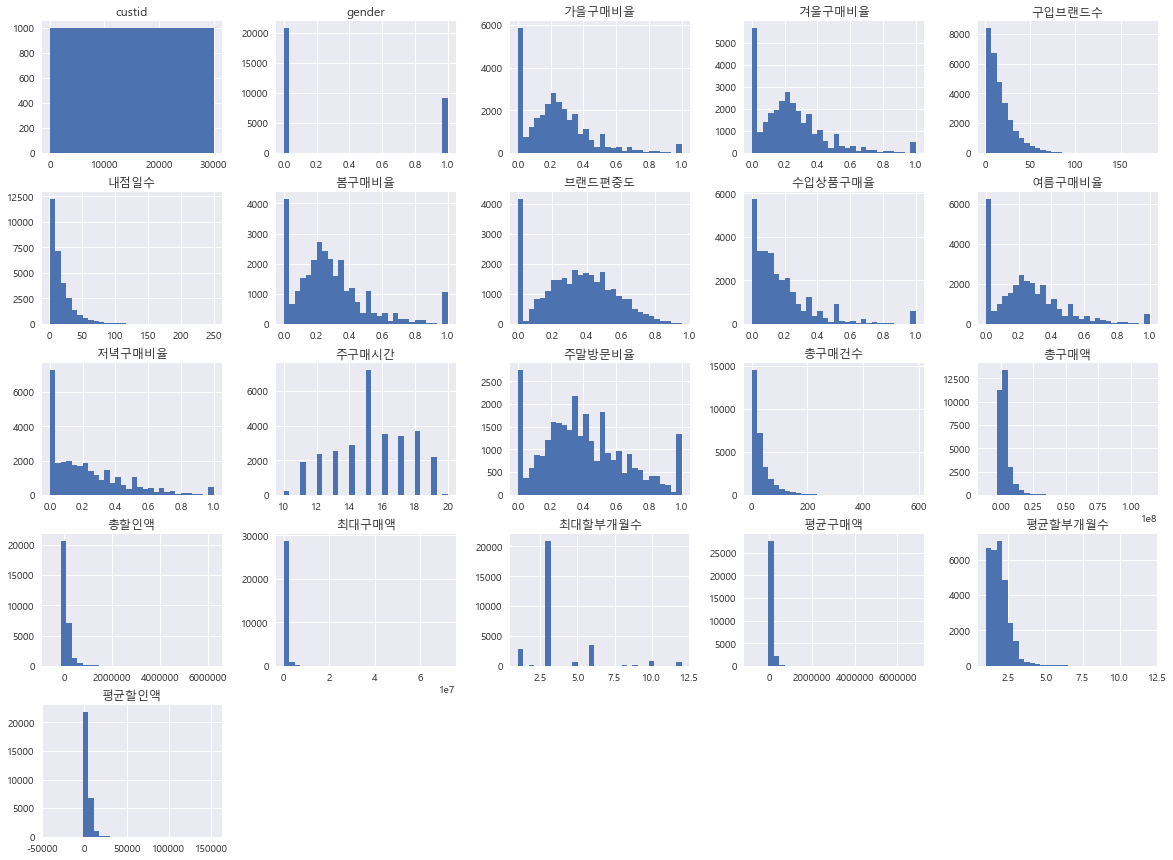

In [33]:
# 모든 연속형 변수에 대한 히스토그램 한꺼번에 그리기

df.hist(bins=30,figsize=(20,15)) #figsize를 통해 plot 크기 조절
plt.show()


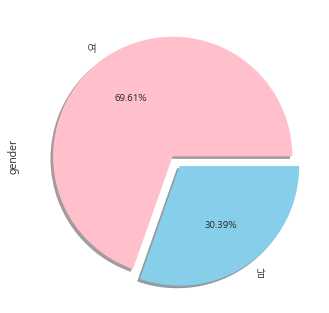

In [34]:
# Target가 완벽한 5:5가 아님을 알 수 있다.
gender.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, labels =['여','남'],colors =['pink','skyblue']) 
plt.show()

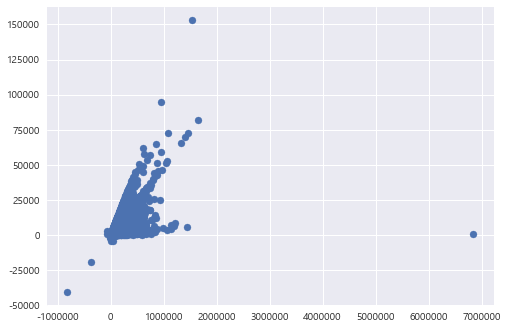

In [35]:
# 둘다 음수거나 너무 튀는 이상치 발견 가능
plt.scatter(x=df['평균구매액'],y=df['평균할인액'])
plt.show()

* Pandas의 DataFrame은 query 명령어를 통해 조건에 맞는 데이터를 쉽게 찾을 수 있습니다
https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.query.html

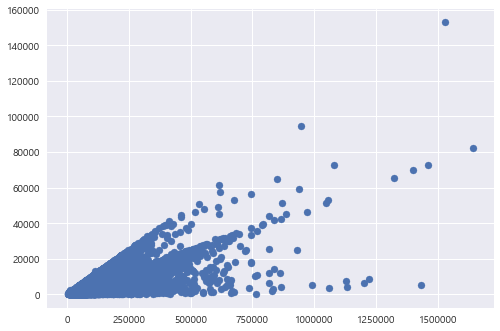

In [36]:
# 예뻐진 산점도 ^-^
df = df.query('평균구매액>0 & 평균구매액 <2000000 & 평균할인액>0')
plt.scatter(x=df['평균구매액'],y=df['평균할인액'])
plt.show()

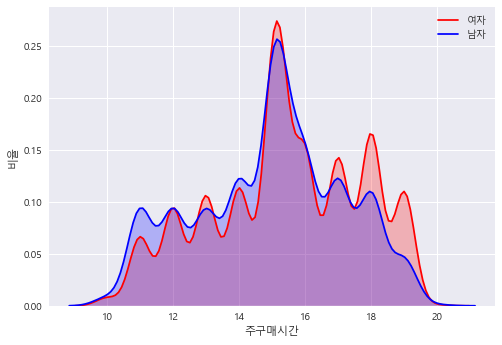

In [37]:
# 성별간 주 구매시간의 분포 미묘한 차이
g = sns.kdeplot(df.query('gender == 0')['주구매시간'], color = "red",shade= True)
g = sns.kdeplot(df.query('gender == 1')['주구매시간'], color = 'blue', shade = True)
g.set_xlabel('주구매시간') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

In [38]:
def major_hour(x):
    if 10 <= x <= 12:
        return 'Morning'
    elif 13 <= x <= 16:
        return 'Afternoon'
    else:
        return 'Evening'

# 첫 번째 피쳐 생성
df['주구매시간대'] = df['주구매시간'].apply(major_hour) # apply를 이용해 행마다 함수 적용

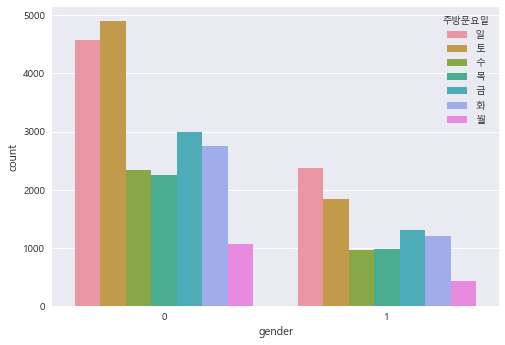

In [39]:
# 성별에 따른 주 방문 요일 분포에 차이가 존재한다
sns.countplot("gender", hue='주방문요일' , data=df) # gender를 기준으로 count 분리, 
plt.show() 

In [40]:
def weekend(x):
    if x in ['토','일']:
        return '주말'
    else :
        return '평일'
# 두 번째 피쳐 생성
df['주말/평일'] = df['주방문요일'].apply(weekend)

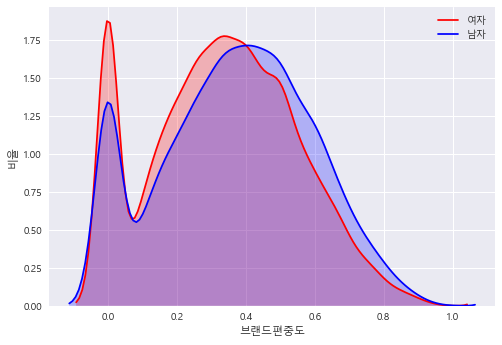

In [41]:
# 여자가 조금 덜 편중됨

g = sns.kdeplot(df.query('gender == 0')['브랜드편중도'], color = "red",shade= True)
g = sns.kdeplot(df.query('gender == 1')['브랜드편중도'], color = 'blue', shade = True)
g.set_xlabel('브랜드편중도') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

In [42]:
def brand_bias(x):
    if x>=0.35:
        return '과편중'
    elif x<0.35:
        return '저편중'
# 세 번째 피쳐 생성
df['과편중/저편중'] = df['브랜드편중도'].apply(brand_bias)

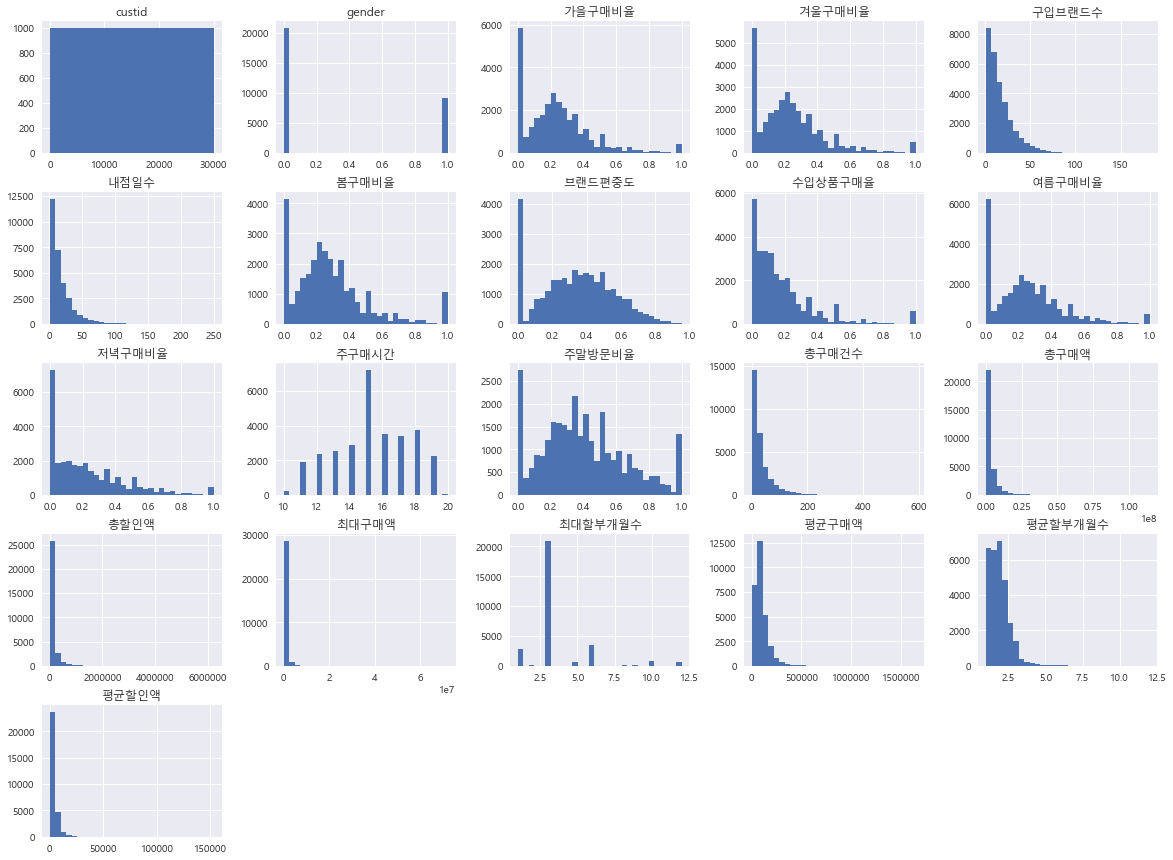

In [43]:
df.hist(bins=30,figsize=(20,15)) # 왼쪽에 과하게 치우친 분포 확인 가능
plt.show()

In [44]:
def log_distribution(x):
    f,ax=plt.subplots(1,2)
    
    x.hist(ax=ax[0],color='black')
    ax[0].set_title(x.name + ' 변환 전')
    
    np.log(x).hist(ax=ax[1],color='green')
    ax[1].set_title(x.name + ' 변환 후')
    plt.show()

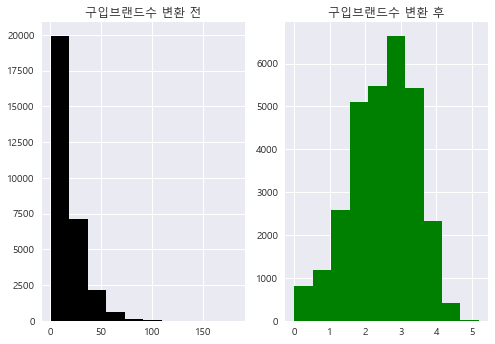

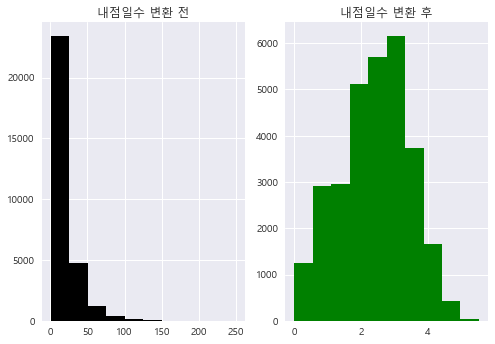

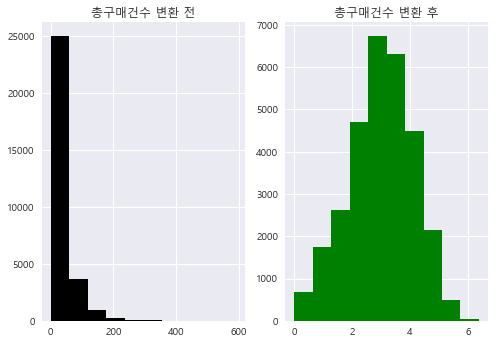

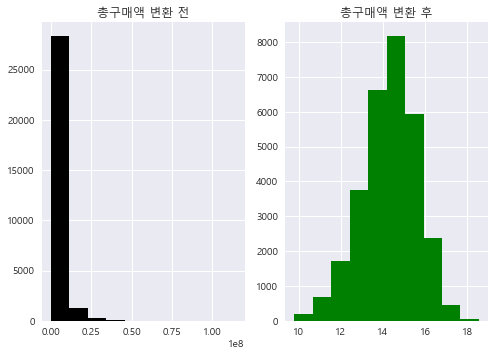

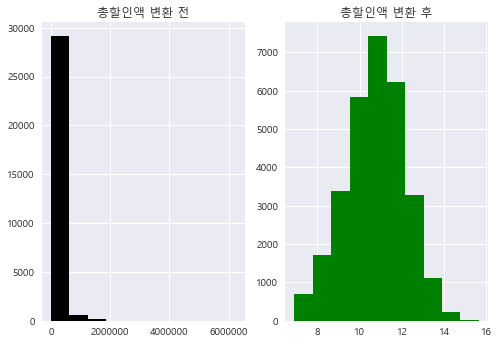

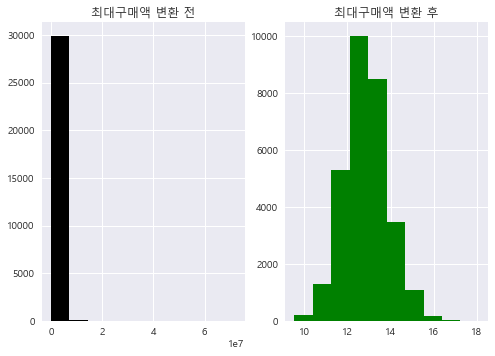

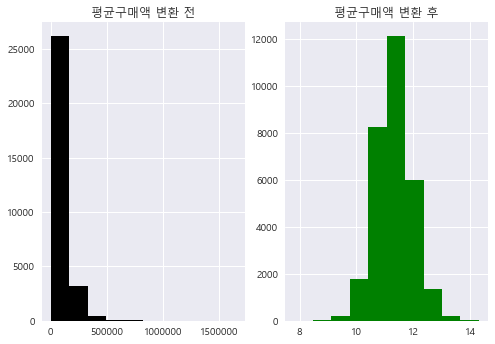

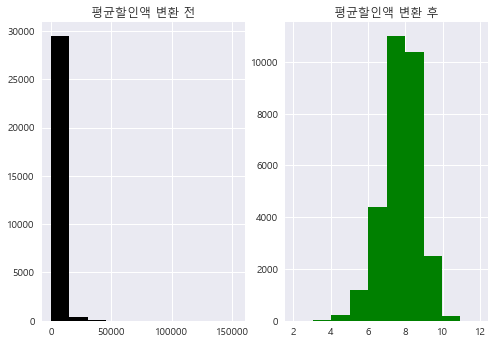

In [45]:
# 정규분포에 가깝게 변화된 것을 확인
skew=['구입브랜드수','내점일수','총구매건수','총구매액','총할인액','최대구매액',
     '평균구매액','평균할인액']

for cols in skew:
    try :
        log_distribution(df[cols])
    except:
        print(cols +' 는 범위 오버')
    

In [46]:
skew.remove('총할인액')
skew.remove('평균할인액')
#skew.remove('평균구매액')


In [47]:
for cols in skew:
    df['log_'+cols]=np.log(df[cols]+1)
    # 5개 피쳐 추가

### Encoding
#### 범주형 변수 처리
 - Python에서 머신러닝 관련 모듈들은 input이 모두 연속형이어야 합니다.  
   
 - 따라서 범주형 변수들을 변환 해 주어야 하는데 방법엔 크게 2가지가 있습니다.    
   
     - One-Hot-Encoding : 명목척도 ( 범주간 순서가 아예 존재하지 않을때 사용합니다. )    
   
     - Label-Encoding : 서열척도 ( 범주간 순서가 존재할 때 주로 사용합니다. )   
           * 사실 이런 조건 외에도, 사용하는 모델에 따라 인코딩을 다르게 하기도 합니다.  

In [48]:
df.info()
categoricals=['주구매브랜드','주구매코너','주방문요일','주구매시간대','주말/평일','과편중/저편중']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29967 entries, 0 to 29999
Data columns (total 33 columns):
custid        29967 non-null int64
총구매액          29967 non-null int64
총구매건수         29967 non-null int64
평균구매액         29967 non-null float64
최대구매액         29967 non-null int64
총할인액          29967 non-null int64
평균할인액         29967 non-null float64
평균할부개월수       29967 non-null float64
최대할부개월수       29967 non-null int64
구입브랜드수        29967 non-null int64
브랜드편중도        29967 non-null float64
수입상품구매율       29967 non-null float64
내점일수          29967 non-null int64
주말방문비율        29967 non-null float64
봄구매비율         29967 non-null float64
여름구매비율        29967 non-null float64
가을구매비율        29967 non-null float64
겨울구매비율        29967 non-null float64
저녁구매비율        29967 non-null float64
주구매브랜드        29967 non-null object
주구매코너         29967 non-null object
주구매시간         29967 non-null float64
주방문요일         29967 non-null object
gender        29967 non-null int64
주구매시간대        29967 non-

In [49]:
# Pandas의 get_dummies를 이용해 쉽게 인코딩 할 수 있습니다
df_categs = pd.get_dummies(df[categoricals], prefix=categoricals)

In [50]:
df = pd.concat([df.drop(categoricals,axis=1),df_categs],axis =1)

In [51]:
# OHE의 단점 : 범주가 여러개면 차원이 너무 늘어난다.
# 그래서 결과값을 차원축소해서 쓰기도 합니다 => 이후 PCA강의에서 설명
df.shape

(29967, 1415)

# 4) 성능 실험

In [52]:
df2 = pd.read_csv('data.csv',encoding='cp949')

In [53]:
df2 = pd.concat([df2.drop(['주구매브랜드','주구매코너','주방문요일'],axis=1),pd.get_dummies(df2[['주구매브랜드','주구매코너','주방문요일']])],axis=1)

In [54]:
df2.fillna(0,inplace=True)

In [55]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df.drop('gender',axis=1), df['gender'], test_size=0.2, random_state=10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop('gender',axis=1), df2['gender'], test_size=0.2, random_state=10)

In [56]:
rf = LGBMClassifier()
rf2 = LGBMClassifier()

rf.fit(X_train,y_train)
print(accuracy_score(rf.predict(X_test),y_test))

rf2.fit(X_train2,y_train2)
print(accuracy_score(rf2.predict(X_test2),y_test2))


0.7050383717050384
0.6955


____